In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [16]:
df_adlan = pd.read_excel("D:/kerja/asisten riset/vol/milkunarc/cadlan/Analysis3_LUC/CCODE_CARBON_EMISSION_6CAT_52tahun_run9.xlsx")
df_hong = pd.read_excel("D:/kerja/asisten riset/vol/milkunarc/cadlan/Validasi Komparasi_NEW.xlsx", sheet_name="Hong Process (GtCO2)")
df_hn = pd.read_excel("D:/kerja/asisten riset/vol/milkunarc/cadlan/Validasi Komparasi_NEW.xlsx", sheet_name="H&N (GtCO2)")
df_blue = pd.read_excel("D:/kerja/asisten riset/vol/milkunarc/cadlan/Validasi Komparasi_NEW.xlsx", sheet_name="BLUE (GtCO2)")
df_oscar = pd.read_excel("D:/kerja/asisten riset/vol/milkunarc/cadlan/Validasi Komparasi_NEW.xlsx", sheet_name="OSCAR (GtCO2)")

## level negara total

### adlan 

In [3]:
df_adlan.rename(columns={"country": "Area"}, inplace=True)
df_adlan_copy = df_adlan.copy()
df_adlan_type = df_adlan_copy[(df_adlan_copy['type'] == "luc_crops") | (df_adlan_copy['type'] == "luc_pasture") | (df_adlan_copy['type'] == "wood_harvest")]
df_adlan_type = df_adlan_type.replace(["luc_crops", "luc_pasture", "wood_harvest"], ["luc-crops", "luc-pasture", "wood-harvest"], regex=True)
df_adlan_group = df_adlan_type.groupby('Area').sum()        

### hong

In [4]:
df_hong_type = df_hong[(df_hong['Process'] == "LUC-Crops") | (df_hong['Process'] == "LUC-Pasture") | (df_hong['Process'] == "Wood Harvest")]
df_hong_type.loc[:, 'Process'] = df_hong_type["Process"].str.lower().values
df_hong_type = df_hong_type.fillna(0)
df_hong_copy = df_hong_type.copy()
df_hong_group = df_hong_copy.groupby('Area').sum()


### H&N

In [5]:
df_hn.rename(columns={"Unnamed: 0": "Area"}, inplace=True)
df_hn_copy = df_hn.copy()
df_hn_copy = df_hn_copy.fillna(0)

### Blue

In [35]:
df_blue.rename(columns={0: "Area"}, inplace=True)
df_blue_copy = df_blue.copy()
df_blue_copy = df_blue_copy.fillna(0)

### oscar

In [7]:
df_oscar.rename(columns={0: "Area"}, inplace=True)
df_oscar_copy = df_oscar.copy()
df_oscar_copy = df_oscar_copy.fillna(0)

In [8]:
negara = df_adlan_group.index
tahun = list(range(1970, 2022))

## level 1 

In [ ]:
df_hn_copy.index = df_hn_copy.Area
df_blue_copy.index = df_blue_copy.Area
df_oscar_copy.index = df_oscar_copy.Area

for country in negara:
    try:
        plt.figure(figsize=(10, 6))
        plt.plot(tahun, df_adlan_group.loc[country][3:].values, label=f'{country} Adlan')
        plt.plot(tahun, df_hong_group.loc[country][1:].values, label=f'{country} Hong')
        plt.plot(tahun, df_hn_copy.loc[country][1:].values, label=f'{country} H&N')
        plt.plot(tahun, df_blue_copy.loc[country][1:].values, label=f'{country} BLUE')
        plt.plot(tahun, df_oscar_copy.loc[country][1:].values, label=f'{country} OSCAR')
        plt.xlabel('Tahun')
        plt.ylabel('Nilai')
        plt.title('Perbandingan Data Time Series per Negara (1970-2021)')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        # plt.savefig(f'D:/kerja/asisten riset/vol/milkunarc/cadlan/Analysis3_LUC/grafik/level1/Grafik1_{country}.png')
        plt.show()
    except:
        print(country)


## level 2

In [ ]:
type = np.array(['luc-crops', 'luc-pasture', 'wood-harvest'])
for type in type:
    for country in negara:        
        try:
            plt.figure(figsize=(10, 6))
            plt.plot(tahun, df_adlan_type[(df_adlan_type['type'] == type) & (df_adlan_type['Area'] == country)].values[0][4:], label=f'{country} {type} Adlan')
            plt.plot(tahun, df_hong_type[(df_hong_type['Process'] == type) & (df_hong_type['Area'] == country)].values[0][2:], label=f'{country} {type} Hong')
            plt.xlabel('Tahun')
            plt.ylabel('Nilai')
            plt.title('Perbandingan Data Time Series per Negara (1970-2021)')
            plt.legend()
            plt.grid(True)
            plt.tight_layout()
            # plt.savefig(f'D:/kerja/asisten riset/vol/milkunarc/cadlan/Analysis3_LUC/grafik/level2/Grafik2_{country} {type}.png')
            plt.show()
        except:
            print(country)


# level 3

In [9]:
hong_merge = pd.merge(left=iso_rev , right=df_hong_group, how="left", left_on="Country", right_on="Area")
hn_merge = pd.merge(left=iso_rev , right=df_hn_copy, how="left", left_on="Country", right_on="Area")
blue_merge = pd.merge(left=iso_rev , right=df_blue_copy, how="left", left_on="Country", right_on="Area")
oscar_merge = pd.merge(left=iso_rev , right=df_oscar_copy, how="left", left_on="Country", right_on="Area") 
adlan_merge = pd.merge(left=iso_rev , right=df_adlan_group, how="left", left_on="Country", right_on="Area") 

adlan_merge_type = pd.merge(left=iso_rev , right=df_adlan_type, how="left", left_on="Country", right_on="Area")
hong_merge_type = pd.merge(left=iso_rev , right=df_hong_copy, how="left", left_on="Country", right_on="Area")

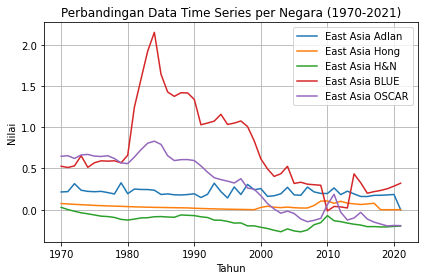

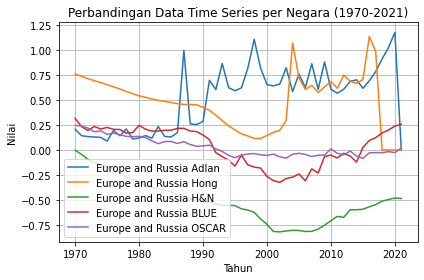

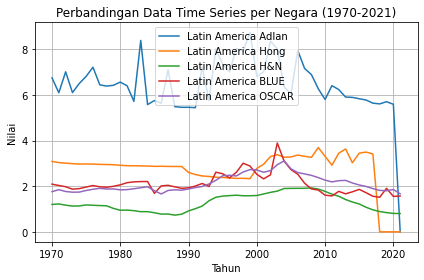

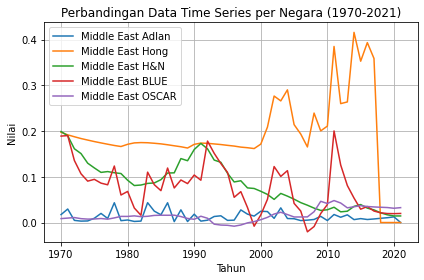

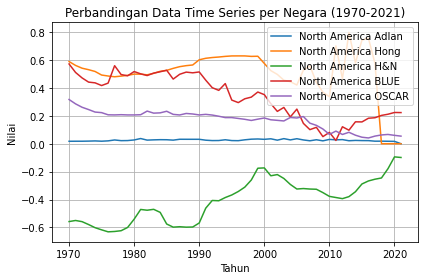

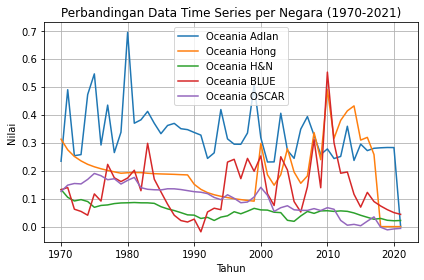

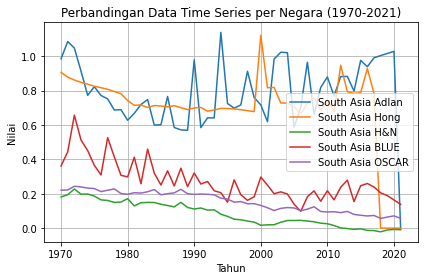

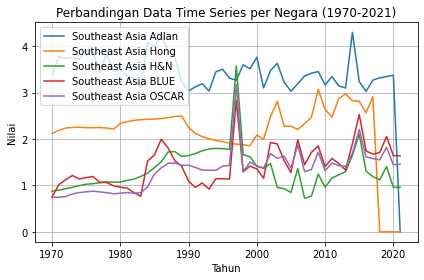

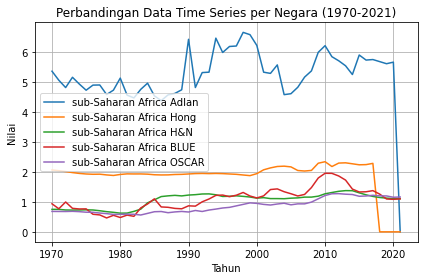

In [13]:
hong_merge_subregion =  hong_merge.groupby('SubRegion').sum()
hn_merge_subregion =  hn_merge.groupby('SubRegion').sum()
blue_merge_subregion =  blue_merge.groupby('SubRegion').sum()
oscar_merge_subregion =  oscar_merge.groupby('SubRegion').sum()
adlan_merge_subregion =  adlan_merge.groupby('SubRegion').sum()

subregion = hong_merge_subregion.index
tahun = list(range(1970, 2022))

for sregion in subregion:
    plt.plot(tahun, adlan_merge_subregion[adlan_merge_subregion.columns[5:]].loc[sregion].values, label=f'{sregion} Adlan')
    plt.plot(tahun, hong_merge_subregion[hong_merge_subregion.columns[3:]].loc[sregion].values, label=f'{sregion} Hong')
    plt.plot(tahun, hn_merge_subregion[hn_merge_subregion.columns[3:]].loc[sregion].values, label=f'{sregion} H&N')
    plt.plot(tahun, blue_merge_subregion[blue_merge_subregion.columns[3:]].loc[sregion].values, label=f'{sregion} BLUE')
    plt.plot(tahun, oscar_merge_subregion[oscar_merge_subregion.columns[3:]].loc[sregion].values, label=f'{sregion} OSCAR')
    plt.xlabel('Tahun')
    plt.ylabel('Nilai')
    plt.title('Perbandingan Data Time Series per Negara (1970-2021)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    # plt.savefig(f'D:/kerja/asisten riset/vol/milkunarc/cadlan/Analysis3_LUC/grafik/level3/Grafik3_{sregion}.png')
    plt.show()


## level 4

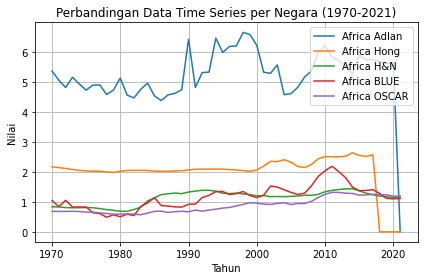

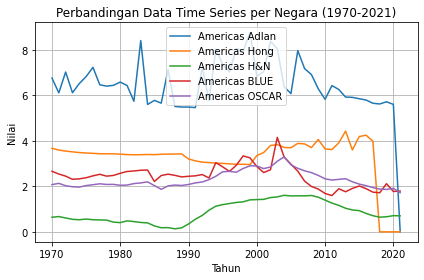

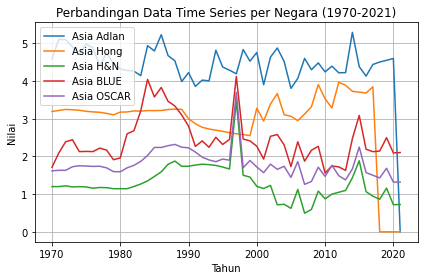

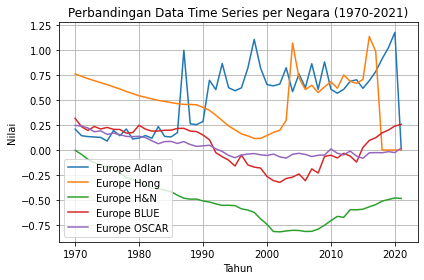

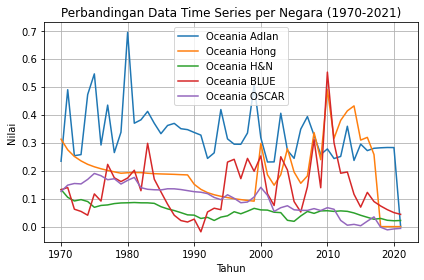

In [84]:
hong_merge_region =  hong_merge.groupby('Region').sum()
hn_merge_region =  hn_merge.groupby('Region').sum()
blue_merge_region =  blue_merge.groupby('Region').sum()
oscar_merge_region =  oscar_merge.groupby('Region').sum()
adlan_merge_region =  adlan_merge.groupby('Region').sum()
region = adlan_merge_region.index
tahun = list(range(1970, 2022))

for region in region:
    plt.plot(tahun, adlan_merge_region.loc[region].values[5:], label=f'{region} Adlan')
    plt.plot(tahun, hong_merge_region.loc[region].values[3:], label=f'{region} Hong')
    plt.plot(tahun, hn_merge_region.loc[region].values[3:], label=f'{region} H&N')
    plt.plot(tahun, blue_merge_region.loc[region].values[3:], label=f'{region} BLUE')
    plt.plot(tahun, oscar_merge_region.loc[region].values[3:], label=f'{region} OSCAR')
    plt.xlabel('Tahun')
    plt.ylabel('Nilai')
    plt.title('Perbandingan Data Time Series per Negara (1970-2021)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    # plt.savefig(f'D:/kerja/asisten riset/vol/milkunarc/cadlan/Analysis3_LUC/grafik/level3/Grafik4_{sregion}.png')
    plt.show()


## level 5

In [ ]:
type = np.array(['luc-crops', 'luc-pasture', 'wood-harvest'])
adlan_merge_type.index =  adlan_merge_type.SubRegion
hong_merge_type.index = hong_merge_type.SubRegion

subregion = adlan_merge_type.index
for type in type:
    for subregion in subregion:
        try:
            plt.plot(tahun, adlan_merge_type[adlan_merge_type['type'] == type].loc[subregion].values[0][7:], label=f'{subregion} {type} Adlan')
            plt.plot(tahun, hong_merge_type[hong_merge_type['Process'] == type].loc[subregion].values[0][5:], label=f'{subregion} {type} Hong')
            plt.xlabel('Tahun')
            plt.ylabel('Nilai')
            plt.title('Perbandingan Data Time Series per Negara (1970-2021)')
            plt.legend()
            plt.grid(True)
            plt.tight_layout()
        #     # plt.savefig(f'D:/kerja/asisten riset/vol/milkunarc/cadlan/Analysis3_LUC/grafik/level5/Grafik5_{subregion} {type}.png')
            plt.show()
        except:
            print(subregion)


## level 6

In [10]:
adlan_merge_type.index =  adlan_merge_type['Region']
hong_merge_type.index = hong_merge_type['Region']

In [ ]:
type = np.array(['luc-crops', 'luc-pasture', 'wood-harvest'])
region = iso_rev["Region"].values

for i, type in enumerate(type):
    for n, region in enumerate(region):
        plt.plot(tahun, adlan_merge_type[adlan_merge_type['type'] == type].loc[region].values[0][7:], label=f'{region} {type} Adlan')
        plt.plot(tahun,  hong_merge_type[hong_merge_type['Process'] == type].loc[region].values[0][5:], label=f'{region} {type} Hong')
        plt.xlabel('Tahun')
        plt.ylabel('Nilai')
        plt.title('Perbandingan Data Time Series per Negara (1970-2021)')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        # plt.savefig(f'D:/kerja/asisten riset/vol/milkunarc/cadlan/Analysis3_LUC/grafik/level6/Grafik6_{region} {type}.png')
        plt.show()
